# Ambientes interactivos
Vamos a integrar todas las herramientas que tenemos hasta ahora en un conjunto de aplicaciones utilizando las librerías de Python. La programación se pone interesante cuando el total vale más que la suma de sus partes.
___

## Canvas y gestion de eventos (bind)
Un `canvas` es un widget que permite incluír gráficos en el GUI. Se pueden incluir figuras geométricas que se definen por código e inclusive incrustar una imágen.

In [2]:
import tkinter as tk
import tkinter.ttk as ttk
from random import randrange

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Tk Animation App")
        
        self.WIDTH = 300
        self.HEIGHT = 400
        self.SIZE = 15
  
        self.x = randrange(1, self.WIDTH - self.SIZE - 1) 
        self.y = randrange(1, self.HEIGHT - self.SIZE - 1)
        self.canvas = tk.Canvas(self, bg='white', 
                                width=self.WIDTH, height=self.HEIGHT)
        self.canvas.pack()

        self.ball = self.canvas.create_oval(self.x, self.y, 
                                            self.x + self.SIZE, self.y + self.SIZE, 
                                            fill='red')
        self.canvas.bind("<Button-1>", self.update_graph)

        
    def update_graph(self, event):
        xmouse, ymouse = event.x, event.y
        
        if self.x < xmouse < (self.x + self.SIZE) and self.y < ymouse < (self.y + self.SIZE):
            self.canvas.delete(self.ball)
            self.x, self.y = randrange(0, self.WIDTH), randrange(0, self.HEIGHT)
            self.ball = self.canvas.create_oval(self.x, self.y, 
                                                self.x + self.SIZE, self.y + self.SIZE, 
                                                fill='red')


app = App().mainloop()

## Lazo temporizado con `after`
Muchos widgets tienen un método llamado `after` que mantiene un temporizador asociado a este. Cada vez que se llama al método, se establece un cronómetro y una vez vebcido el tiempo se invoca a otro método o función.

In [5]:
import tkinter as tk
import tkinter.ttk as ttk
from random import randrange, uniform

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Tk Animation App")

        self.WIDTH = 300
        self.HEIGHT = 400
        self.SIZE = 10
        self.DELAY = 50    # 50ms
        
        self.x = randrange(1, self.WIDTH - self.SIZE - 1)
        self.y = randrange(1, self.HEIGHT - self.SIZE - 1)
        self.dx = uniform(-10, 10)
        self.dy = uniform(-10, 10)
        self.pause_animation = False
        
        self.canvas = tk.Canvas(self, bg='white', width=self.WIDTH, height=self.HEIGHT)
        self.canvas.pack()
        
        self.ball = self.canvas.create_oval(self.x, self.y, 
                                            self.x + self.SIZE, self.y + self.SIZE, 
                                            fill='red')

        self.canvas.bind("<Button-1>", self.control_animation)
        

    def control_animation(self, handle):
        self.pause_animation = not self.pause_animation  
        
        if self.pause_animation:
            self.text_pause = self.canvas.create_text(self.WIDTH/2, self.HEIGHT/2,
                                                      text="Animation Paused", 
                                                      font='Arial 12 bold')
        else:
            self.canvas.delete(tk.ALL)
        
        
    def animate_canvas(self):
        if not self.pause_animation:
            #self.canvas.delete(self.ball)
            if self.x <= 0 or (self.x + self.SIZE) >= self.WIDTH:
                self.dx = -self.dx
                
            if self.y <= 0 or (self.y+ self.SIZE) >= self.HEIGHT:
                self.dy = -self.dy
                
            self.x += self.dx
            self.y += self.dy
            
            self.canvas.move(self.ball, self.dx, self.dy)
            #self.ball = self.canvas.create_oval(self.x, self.y, 
            #                                    self.x + self.SIZE, self.y + self.SIZE, 
            #                                    fill='red')
            
        self.canvas.after(self.DELAY, self.animate_canvas)    
          

app = App()
app.animate_canvas()
app.mainloop()

## Tiempo real en tkinter
Utilizando el método `after`, se pueden temporizar varios procesos de forma simultanea en el mismo GUI. Podemos utilizar la librería `psutil` que retorna información sobre el hardware del sistema y monitorearlo utilizando una aplicación gráfica.

In [ ]:
import psutil

print(f"Uso del CPU [%]: {psutil.cpu_percent()}")
print(f"Velocidad del CPU [Mhz]: {psutil.cpu_freq().current:,}")
print(f"Memoria instalada [Mb]: {psutil.virtual_memory().total / 1e6:,}")
print(f"Battery [%]: {psutil.sensors_battery().percent}")

In [7]:
import psutil
import tkinter as tk
import tkinter.ttk as ttk

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("CPU Data")
        self.resizable(0, 0)

        self.var_usage_CPU = tk.DoubleVar()
        self.var_battery_percent = tk.IntVar(value=50)

        frm = tk.Frame(self)
        frm.pack(padx=10, pady=10)
        
        self.lblCPU_Usage = tk.Label(frm, text="", font="Arial 16 bold")
        self.lblBAT_Usage = tk.Label(frm, text="", font="Arial 16 bold")

        self.lblCPU_Usage.grid(row=0, column=0, padx=5, pady=5, sticky=tk.W)
        self.lblBAT_Usage.grid(row=1, column=0, padx=5, pady=5, sticky=tk.W)

        self.read_psutil_data()


    def read_psutil_data(self):
        self.var_usage_CPU.set(psutil.cpu_percent())
        self.var_battery_percent.set(psutil.sensors_battery().percent)
        self.lblCPU_Usage.config(text=f"CPU Usage: {self.var_usage_CPU.get()}%")
        self.lblBAT_Usage.config(text=f"Battery Available: {self.var_battery_percent.get()}%")
        
        if psutil.sensors_battery().power_plugged:
            self.lblBAT_Usage.config(fg='black');
        else:
            self.lblBAT_Usage.config(fg='red');
        
        self.after(1000, self.read_psutil_data)


app = App().mainloop()

## matplotlib en tkinter
Se puede insertar un gráfico de matplotlib en una interface tkinter, utilizando el objeto `FigureCanvasTkAgg`. Esto permite crear una figura que recibirá el `Figure` de matplotlib y lo convertirá en un widget tipo `Canvas`.

Posteriormente, este canvas de puede actualizar con el método `draw`. Los cambios en la gráfica se hacen directamente sobre la información de los arreglos a plotear.

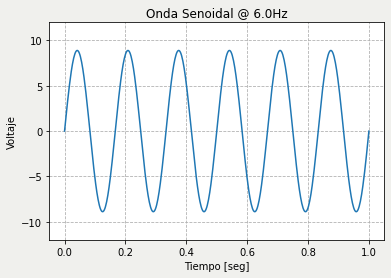

In [33]:
import tkinter.ttk as ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Onda Senoidal")
        
        frm = tk.Frame(self)
        frm.pack(padx=10, pady=10)
        
        self.freq = tk.IntVar(value=1)
        self.amp = tk.DoubleVar(value=6.0)
        self.Y_LIMIT = 12
        self.FREQ_MAX = 10
        
        frm1 = tk.Frame(frm)
        frm2 = tk.Frame(frm)
        frm1.pack(padx=10, pady=10)
        frm2.pack(padx=10, pady=10)
        
        frmAmp = tk.LabelFrame(frm2, text="Amplitud")
        frmFreq = tk.LabelFrame(frm2, text="Frecuencia")
        frmAmp.pack(padx=10, pady=10, side=tk.LEFT)
        frmFreq.pack(padx=10, pady=10, side=tk.LEFT)
        
        self.fig, self.ax = plt.subplots(figsize=(6, 4), facecolor="#F0F0ED")
        self.t = np.linspace(0, 1, 50 * self.FREQ_MAX)
        self.line, = self.ax.plot(self.t, self.amp.get() * np.sin(2 * np.pi * self.freq.get() * self.t))
        self.ax.set_title(f"Onda Senoidal @ {self.freq.get():.1f}Hz")
        self.ax.set_xlabel("Tiempo [seg]")
        self.ax.set_ylabel("Voltaje")
        self.ax.set_ylim(-self.Y_LIMIT, self.Y_LIMIT)
        self.ax.grid(linestyle='dashed')
        
        # -------------------- frm1 ------------------------------
        self.graph = FigureCanvasTkAgg(self.fig, master=frm1)
        self.graph.get_tk_widget().pack(expand=True, fill=tk.X)
        
        # -------------------- frm2 ------------------------------
        self.AmpDown = tk.Button(frmAmp, text="<", font="Arial 12 bold", width=6, command=self.amp_down)
        self.AmpUp = tk.Button(frmAmp, text=">", font="Arial 12 bold", width=6, command=self.amp_up)
        self.FreqDown = tk.Button(frmFreq, text="<", font="Arial 12 bold", width=6, command=self.freq_down)
        self.FreqUp = tk.Button(frmFreq, text=">", font="Arial 12 bold", width=6, command=self.freq_up)
        
        self.AmpDown.grid(row=0, column=0, padx=5, pady=5)
        self.AmpUp.grid(row=0, column=1, padx=5, pady=5)
        self.FreqDown.grid(row=0, column=0, padx=5, pady=5)
        self.FreqUp.grid(row=0, column=1, padx=5, pady=5)
        
        
    def amp_down(self):
        if self.amp.get() > 0:
            self.amp.set(self.amp.get() - 0.1)
        self.update_graph()
    
    def amp_up(self):
        if self.amp.get() < self.Y_LIMIT:
            self.amp.set(self.amp.get() + 0.1)
        self.update_graph()
    
    def freq_down(self):
        if self.freq.get() > 1:
            self.freq.set(self.freq.get() - 1)
        self.update_graph()
    
    def freq_up(self):
        if self.freq.get() < self.FREQ_MAX:
            self.freq.set(self.freq.get() + 1)
        self.update_graph()
    
    def update_graph(self):
        self.line.set_ydata(self.amp.get() * np.sin(2 * np.pi * self.freq.get() * self.t))
        self.ax.set_title(f"Onda Senoidal @ {self.freq.get():.1f}Hz")
        self.graph.draw()
        
        
app = App().mainloop()

## ipywidgets: interactividad en un Jupyter Notebook
Los Jupyter Notebooks también soportan widgets gráficos con la combinación de las librerías `ipywidgets` y `IPython.display`. `ipywidgets` contiene una colección de objetos gráficos contstruidos con JavaScript que se pueden ejecutar en el documento. `IPython.display` es una colección de *renders* que permiten mostrar información gráfica.

In [34]:
from IPython.display import display
from ipywidgets import IntSlider

slider = IntSlider(min=10, max=100, step=5)
display(slider)

IntSlider(value=10, min=10, step=5)

Los valores gestionados por estos widgets (`widget.value`) se pueden asociar como parametros de una función con `interact`:

In [35]:
from ipywidgets import interact

def suma(a, b):
    print("Suma:", a + b)
    
gui = interact(suma, a=(1, 10), b=(1, 10))
display(gui)

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=5, description='b', …

<function __main__.suma(a, b)>

Otra forma de hacer esto es utilizando `interact` como un decorador de la función:

In [36]:
@interact(a=(1, 10), b=(1, 10))
def suma(a, b):
    print("Suma:", a + b)

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=5, description='b', …

### Algunos widgets disponibles
Lista completa: (https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [38]:
from ipywidgets import *

w1 = IntSlider(description="IntSlider")
w2 = FloatSlider(description="FloatSlider")
w3 = BoundedIntText(description="BoundedIntText")
w4 = BoundedFloatText(description="BoundedFloatText", step=0.5)
w5 = Combobox(description="Combobox", options=['1', '2', '3'])
w6 = Dropdown(description="Dropdown", options=[1, 2, 3])
w7 = RadioButtons(description="RadioButtons", options=[1, 2, 3])
w8 = Checkbox(description="Checkbox")
w9 = Text(description="Text")
w10 = Button(description="Button")

gui = VBox([w1, w2, w3, w4, w5, w6, w7, w8, w9, w10])

display(gui)

## Eventos
Los widgets manejan eventos definidos como métodos del objeto widget. Por ejemplo, en el caso del `Button`, el evento a consutar en `on_click`:

In [ ]:
txt = Text(description="Mensaje")
but = Button(description="Click")

layout = HBox([txt, but])
display(layout)

def print_message(event):
    print(txt.value)

but.on_click(print_message)

Otros widgets sportan el método `observe` que les permite ser observados constantemente y llama a un evento en cuando haya sucedido un cambio con el widget.

In [ ]:
txt = Text(description="Numero")
sld = IntSlider(description="Seleccione")

layout = HBox([txt, sld])
display(layout)

def print_message(event):
    txt.value = str(sld.value)

sld.observe(print_message)

Sin embargo, la mejora manera de tomar control sobre estas acciones es a través de `interactive`, que retorna un VBox que se puede instanciar como un objeto para luego mostrarlo con `display`:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_circle(r, color, grid, line_style):
    x = r * np.cos(np.linspace(0, 2*np.pi, 100))
    y = r * np.sin(np.linspace(0, 2*np.pi, 100))
    plt.plot(x, y, color=color, linestyle=line_style)
    plt.axis('square')
    plt.grid(grid)
    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    plt.show()
    
w1 = FloatSlider(description="Radio:", min=1, max=12)  
w2 = Dropdown(description="Color", options={'Azul': 'blue', 'Rojo': 'red', 'Verde': 'green'})
w3 = Checkbox(description="Grilla?")
w4 = RadioButtons(description="Linea", options=["-", "--", "-.", ":"])

layout = interactive(plot_circle, r=w1, color=w2, grid=w3, line_style=w4, continuous_update=False)
display(layout)

### Control del GUI: interactive_output
Si se quiere organizar los diferentes widgets en el documento, hay que agruparlos en `Hbox` y `VBox`. Sin embargo, es necesario asociar los widgets a la función con `interactive`, que retorna un `VBox`, por lo que si se muestran ambos con `display` se verán ambos diseños.

La función `interactive_output` permite interactuar con una función y mantener el control del diseño, ya que esta no genera un GUI (VBox), sino solo el objeto para que pueda ser incluida en un diseño (layout).

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def plot_circle(r, color, grid, line_style):
    x = r * np.cos(np.linspace(0, 2*np.pi, 100))
    y = r * np.sin(np.linspace(0, 2*np.pi, 100))
    plt.plot(x, y, color=color, linestyle=line_style)
    plt.axis('square')
    plt.grid(grid)
    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    plt.show()
    
    
w1 = FloatSlider(description="Radio:", min=1, max=12)  
w2 = Dropdown(description="Color", options={'Azul': 'blue', 'Rojo': 'red', 'Verde': 'green'})
w3 = Checkbox(description="Grilla?")
w4 = RadioButtons(description="Linea", options=["-", "--", "-.", ":"])

out = interactive_output(plot_circle, {'r':w1, 'color':w2, 'grid':w3, 'line_style':w4})

box1 = HBox([w1, w2]) 
box2 = HBox([w3, w4])
gui = VBox([box1, box2])
layout = HBox([gui, out])
display(layout)

## Y Voila!
En el 2019 [se publico en GitHub el código del proyecto Voila](https://github.com/voila-dashboards/voila), que promete convertír un documento Jupyter en una aplicación web interactiva. Esto permite tener un Jupyter Notebook como un dashboard web con los resultados de las celdas, pero lo interesante sucede cuando el documento contiene widgets interactivos, pues estos son generados como parte del código.

Primero, instale Voila:

    conda install -c conda-forge voila
    
Luego, reinicie el ambiente Jupyter y podrá ver un nuevo icono en la bara de herramientas, en la sección central. Confeccione un documento Jupyter que contenga solamente una celda (por ejemplo, copie toda la celda anterior en un solo documento) y luego haga click en el nuevo boton.

Y Voila... ¡un dashboard web sin haber escrito una sola letra de JavaScript! ¿Se imagina lo que puede construír?